In [1]:
import pandas as pd
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)


df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df["target"] = housing.target

df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
df = df.reset_index(drop=True)
X = df[housing.feature_names]
targets = df["target"]
# Always use transform_data function on X
scaler = StandardScaler().fit(np.array(targets).reshape(-1, 1))
targets = scaler.transform(np.array(targets).reshape(-1, 1)).flatten()

df["target"] = targets
data=df

In [2]:
import sys
sys.path.append('..')

In [3]:
from xDL.models.NAM import NAM

In [5]:
nam = NAM(
    "target ~  -1  + RandomFourierNet(MedInc) + MLP(AveRooms; encoding=one_hot; n_bins=10; hidden_dims=[12, 12, 12]) + ResNet(AveOccup) + MLP(AveBedrms) + MLP(Population) + MLP(Latitude):MLP(Longitude)",
    data=data,
    feature_dropout=0.0001,
)




--- Preprocessing ---


0it [00:00, ?it/s]

8it [00:00, 66.24it/s]

MedInc float64
AveRooms float64
AveOccup float64
AveBedrms float64
Population float64
Latitude float64
Longitude float64
target float64



7it [00:00, 855.48it/s]


------------- Network architecture --------------
MedInc -> RandomFourierNet(feature=MedInc, n_params=270465) -> output dimension=1
AveRooms -> MLP(feature=AveRooms, n_params=456) -> output dimension=1
AveOccup -> ResNet(feature=AveOccup, n_params=49920) -> output dimension=1
AveBedrms -> MLP(feature=AveBedrms, n_params=12736) -> output dimension=1
Population -> MLP(feature=Population, n_params=12736) -> output dimension=1
Latitude_._Longitude -> MLP(feature=Latitude_._Longitude, n_params=12864) -> output dimension=1


In [6]:
nam.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(
        reduction="sum_over_batch_size", name="mean_squared_error"
    ),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.RootMeanSquaredError()],
)

# Train the model
nam.fit(nam.training_dataset, epochs=10, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/10


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 14.1390 - mean_squared_error: 14.1390 - root_mean_squared_error: 3.6119 - val_loss: 0.6359 - val_mean_squared_error: 0.6359 - val_root_mean_squared_error: 0.7975
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 1.2350 - mean_squared_error: 1.2350 - root_mean_squared_error: 1.1112 - val_loss: 0.4961 - val_mean_squared_error: 0.4961 - val_root_mean_squared_error: 0.7044
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.9011 - mean_squared_error: 0.9011 - root_mean_squared_error: 0.9492 - val_loss: 0.4822 - val_mean_squared_error: 0.4822 - val_root_mean_squared_error: 0.6946
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.7226 - mean_squared_error: 0.7226 - root_mean_squared_error: 0.8501 - val_loss: 0.4379 - val_mean_squared_error: 0.4379 - val_root_mean_squared_error: 0.6618
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.6913 - mean_squared_error: 0.6913 - root_mean_squared_error: 0.8310 - 

In [ ]:
significances = nam.get_significance()

In [ ]:
significances

,feature,t-stat,p_value
0,MedInc,[2.5529],[0.007]
1,AveRooms,[0.0148],[0.988]
2,AveOccup,[15.9533],[0.0002]
3,AveBedrms,[-3.0322],[0.0022]
4,Population,[-1.5897],[0.1158]
5,Latitude<>Longitude,[-10.7947],[0.0002]


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


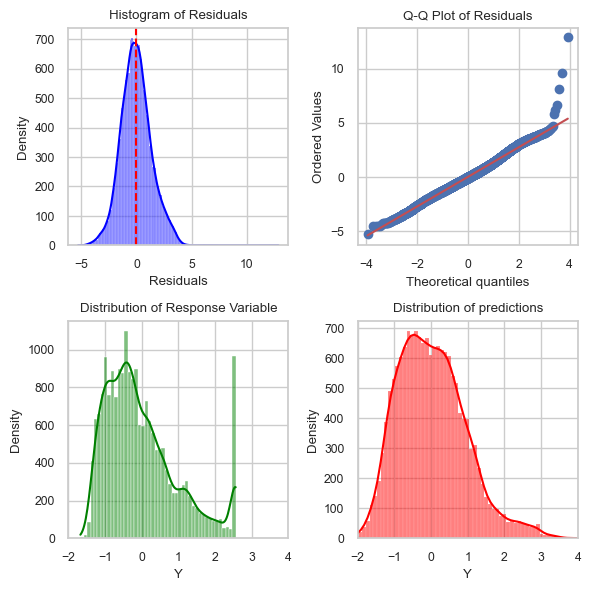

In [ ]:
nam.analytics_plot()

In [ ]:
import tensorflow as tf

def is_float_type(tensor):
    dtype = tf.as_dtype(tensor.dtype)
    return dtype.is_floating

In [ ]:
preds = nam._get_plotting_preds()
nam.feature_nets[-1].input[0].dtype

'float32'

In [ ]:
if not is_float_type(nam.feature_nets[-1].input[1]) or not is_float_type(nam.feature_nets[-1].input[0]):
    print("hey")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


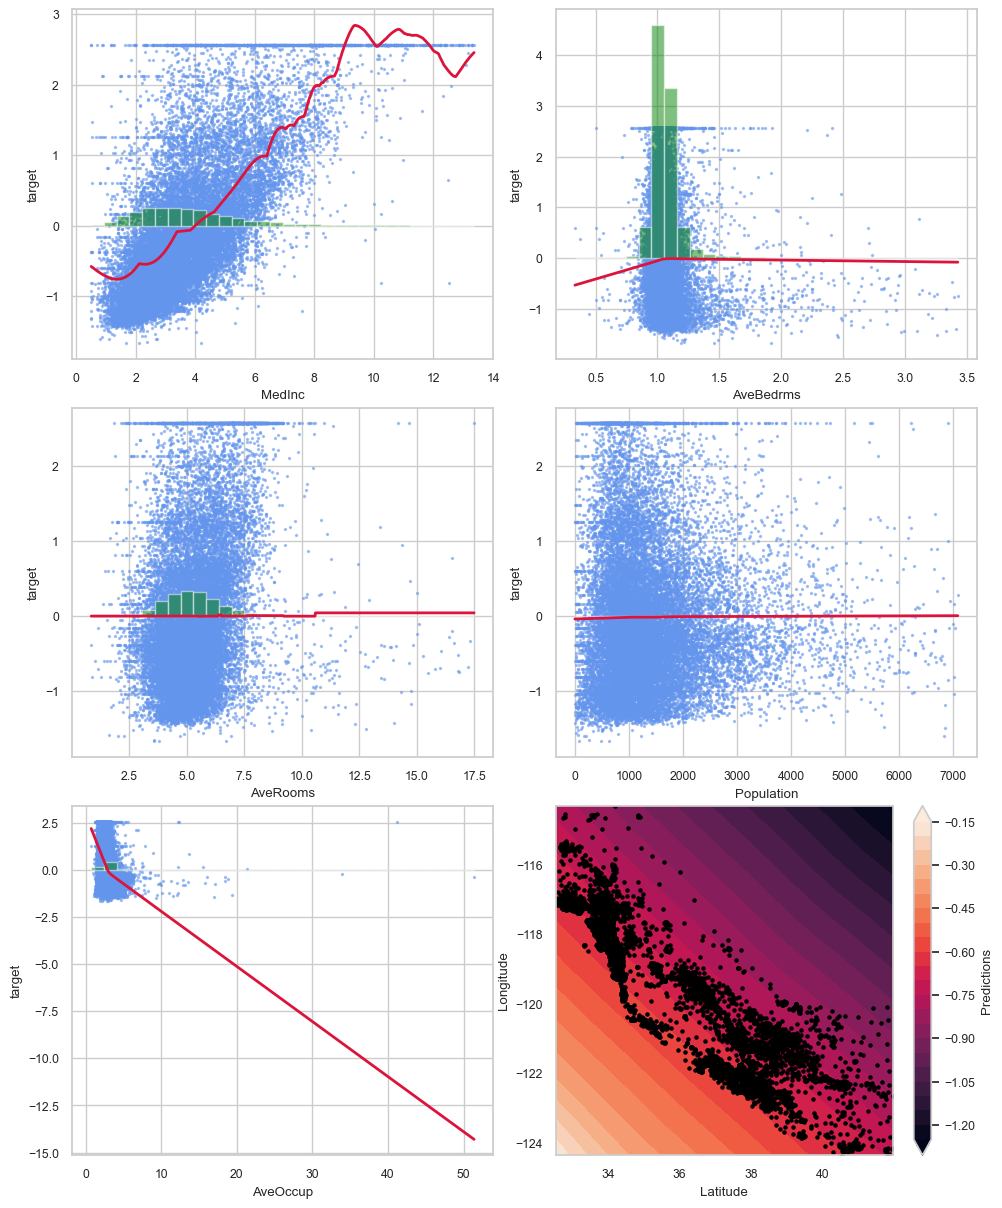

In [ ]:
nam.plot()

# Test Titanic

In [5]:
dataset = keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [26]:
nam = NAM(
    "survived ~  -1 + MLP(fare) + MLP(n_siblings_spouses) + MLP(age) + MLP(parch) + MLP(sex) + MLP(deck) + MLP(embark_town) + MLP(alone)", 
    data=TITANIC, 
    feature_dropout=0.0001, 
    output_activation="sigmoid")

--- Preprocessing ---


0it [00:00, ?it/s]

9it [00:00, 117.87it/s]


fare float64
n_siblings_spouses int64
age float64
parch int64
sex object
deck object
embark_town object
alone object
survived int64


8it [00:00, 224.32it/s]


------------- Network architecture --------------
fare -> MLP(feature=fare, n_params=12736) -> output dimension=1
n_siblings_spouses -> MLP(feature=n_siblings_spouses, n_params=13632) -> output dimension=1
age -> MLP(feature=age, n_params=12736) -> output dimension=1
parch -> MLP(feature=parch, n_params=13504) -> output dimension=1
sex -> MLP(feature=sex, n_params=12992) -> output dimension=1
deck -> MLP(feature=deck, n_params=13760) -> output dimension=1
embark_town -> MLP(feature=embark_town, n_params=13248) -> output dimension=1
alone -> MLP(feature=alone, n_params=12992) -> output dimension=1


In [27]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=[keras.metrics.BinaryAccuracy()])

# Train the model
nam.fit(nam.training_dataset, epochs=50, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/50


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - binary_accuracy: 0.4801 - loss: 0.7345 - val_binary_accuracy: 0.6800 - val_loss: 0.6533
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - binary_accuracy: 0.5498 - loss: 0.6948 - val_binary_accuracy: 0.7120 - val_loss: 0.6041
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.5737 - loss: 0.6985 - val_binary_accuracy: 0.5520 - val_loss: 0.6720
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - binary_accuracy: 0.6275 - loss: 0.6468 - val_binary_accuracy: 0.6000 - val_loss: 0.6385
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - binary_accuracy: 0.6076 - loss: 0.6683 - val_binary_accuracy: 0.6320 - val_loss: 0.6131
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - binary_accuracy: 0.6335 - loss: 0.6545 - val_binary_accuracy: 0.7280 - val_loss: 0.5505
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - binary_accuracy: 0.6594 - loss: 0.6344 - val_binary_accuracy: 0.7120 - val_loss: 0.5442
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

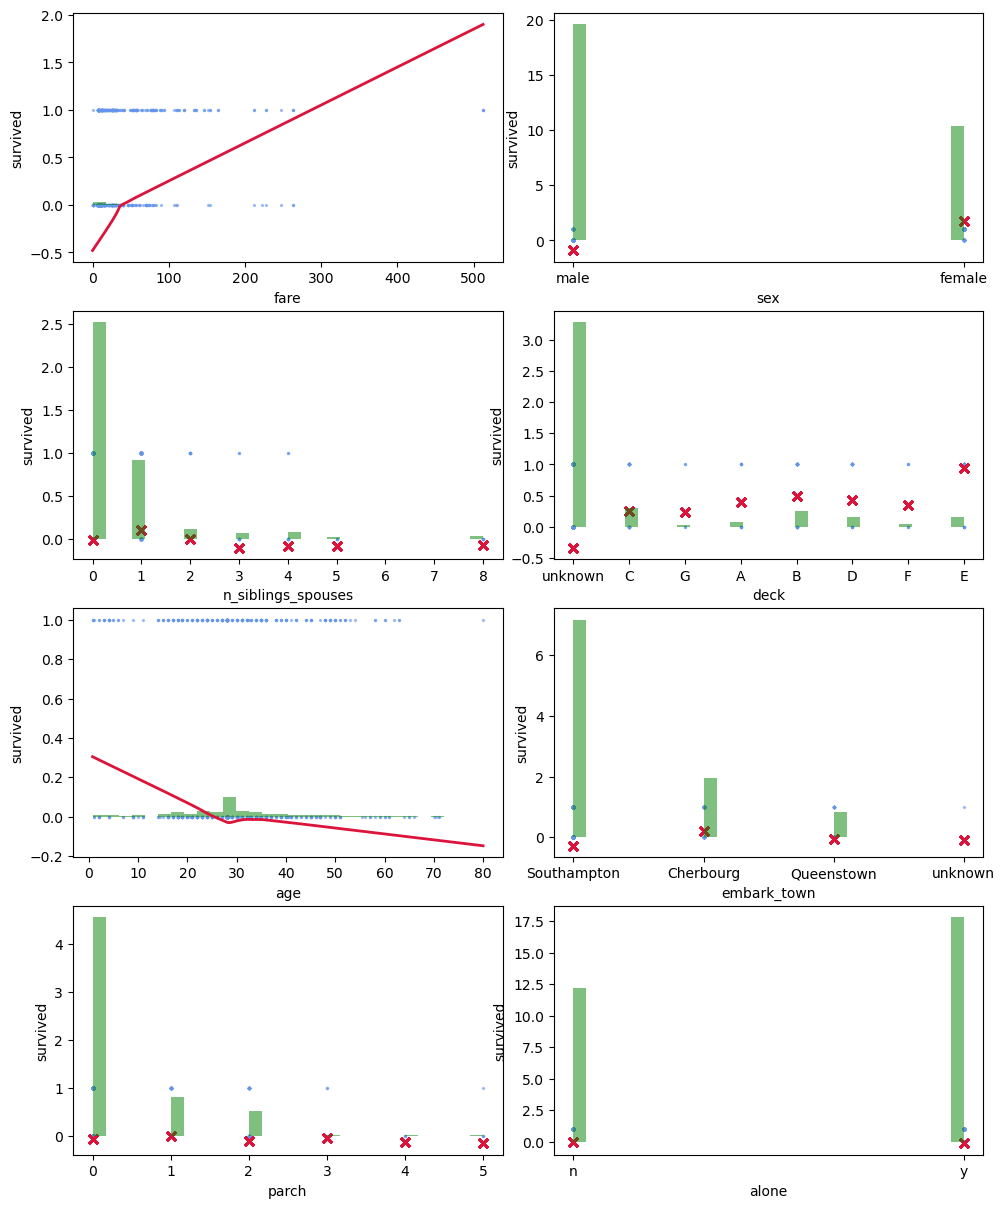

In [28]:
nam.plot()

In [22]:
threshold = 0.5
predictions = nam.predict(nam.training_dataset)
true_labels = next(iter(nam.training_dataset))[1]
binary_predictions = tf.cast(tf.greater(predictions, threshold), tf.int32)

# Initialize the accuracy metric
accuracy_metric = keras.metrics.Accuracy()

# Update the metric with your true labels and binary predictions
accuracy_metric.update_state(true_labels, binary_predictions)

# Get the result
accuracy = accuracy_metric.result().numpy()
print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Accuracy: 0.5976096


In [25]:
np.min(nam.predict(nam.training_dataset))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


-0.254385769367218

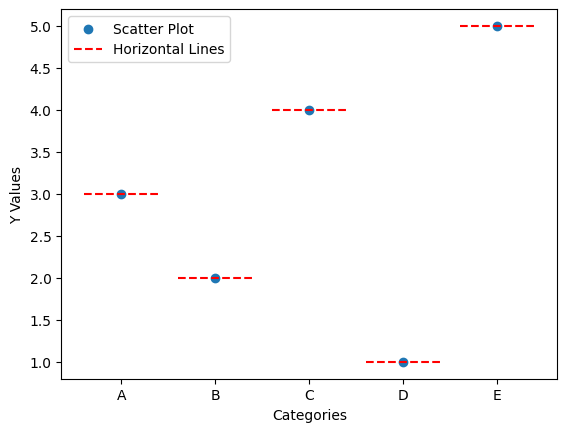

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample categorical data and corresponding y-values
categories = ['A', 'B', 'C', 'D', 'E']
y_values = [3, 2, 4, 1, 5]

# Create a scatterplot
plt.scatter(categories, y_values, label='Scatter Plot')

# Add horizontal lines at the y positions
y_positions = y_values  # Use the y_values directly
x_positions = np.arange(len(categories))  # Numerical x-positions
plt.hlines(y_positions, xmin=x_positions - 0.4, xmax=x_positions + 0.4, colors='r', linestyle='dashed', label='Horizontal Lines')

# Label the axes and add a legend
plt.xlabel('Categories')
plt.ylabel('Y Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
nam.feature_information

{'fare': {'Network': 'MLP',
  'dtype': dtype('float64'),
  'encoding': 'normalized'},
 'n_siblings_spouses': {'Network': 'MLP',
  'dtype': dtype('int64'),
  'encoding': 'one_hot'},
 'age': {'Network': 'MLP',
  'dtype': dtype('float64'),
  'encoding': 'normalized'},
 'parch': {'Network': 'MLP', 'dtype': dtype('int64'), 'encoding': 'one_hot'},
 'sex': {'Network': 'MLP', 'dtype': dtype('O'), 'encoding': 'one_hot'},
 'deck': {'Network': 'MLP', 'dtype': dtype('O'), 'encoding': 'one_hot'},
 'embark_town': {'Network': 'MLP', 'dtype': dtype('O'), 'encoding': 'one_hot'},
 'alone': {'Network': 'MLP', 'dtype': dtype('O'), 'encoding': 'one_hot'}}

In [ ]:
# additive_model.py
class AdditiveModel:
    def __init__(self):
        self.custom_functions_registry = {}

    def register_custom_function(self, name):
        def decorator(func):
            self.custom_functions_registry[name] = func
            return func
        return decorator

    def use_custom_function(self, custom_function_name, *args, **kwargs):
        if custom_function_name in self.custom_functions_registry:
            custom_function = self.custom_functions_registry[custom_function_name]
            result = custom_function(*args, **kwargs)
            return result
        else:
            raise ValueError(f"Custom function '{custom_function_name}' is not registered.")

# Example usage:

# Create an instance of the AdditiveModel class
model = AdditiveModel()

# Define a custom function and register it with a name
@model.register_custom_function("multiply")
def custom_multiply(a, b):
    return a * b

@model.register_custom_function("add")
def custom_add(a, b):
    return a + b

# Use the custom functions in the model
result1 = model.use_custom_function("multiply", 5, 3)
print(f"Result of multiply: {result1}")

result2 = model.use_custom_function("add", 7, 4)
print(f"Result of add: {result2}")


Result of multiply: 15
Result of add: 11


In [ ]:
from keras.utils import to_categorical
to_categorical(TITANIC["n_siblings_spouses"])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)